# Data analysis - Employee promotion

This notebook analyses the dataset *Employee promotion*, available from [kaggle](https://www.kaggle.com/datasets/arashnic/hr-ana).

This notebook is part of the tutorial **A hands-on tutorial on explainable methods for machine learning with Python: applications to gender bias**, 3rd EuADS Summer School – Data Science for Explainable and Trustworthy AI (7-9 June 2023)

Author: Aurora Ramírez (University of Córdoba)

## Dataset description

This dataset collects information on 54808 employees of a company, who were evaluated for promotion. The target variable (*is_promoted*) refers to whether the employee was recommended for promotion or no after the evaluation process.

### Features

The dataset contains 12 variables (plus the target variable):

- employee_id: The unique ID for the employee (numerical)
- department: The current department of the employee (categorical, 9 categories)
- region: A code for the region of employment (categorical, 34 categories)
- education: The education level of the employee (categorical, 3 categories)
- gender: The gender of the employee (categorical, 2 categories)
- recruitment_channel: The channel of recruitment for employee (categorical, 3 categories)
- no_of_trainings: Number of other trainings completed by the employee in previous year on soft skills, technical skills etc. (numerical)
- age: The age of the employee (numerical)
- previous_year_rating: The rating of the employee for the previous year (numerical)
- length_of_service: Number of years of (numerical)
- awards_won?: Whether the employee won awards won during previous year (numerical, 0/1)
- avg_training_score: Average score of the employee in current training evaluations (numerical)
- is_promoted (target): The employee was recommended for promotion (0=no/1=yes)


## Dataset analysis
### Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

### Loading data

In [2]:
# Open dataset from CSV
data = pd.read_csv('../data/employee_promotion.csv')
n_rows = data.shape[0]
n_cols = data.shape[1]
print('Data frame loaded with %d rows and %d columns' % (n_rows, n_cols))

Data frame loaded with 54808 rows and 13 columns


### Cleaning data

In [3]:
# Remove employee ID
data.drop('employee_id', axis=1, inplace=True)

# Remove row with missing values
data.dropna(axis=0, inplace=True)

n_rows = data.shape[0]
n_cols = data.shape[1]
print('Data frame cleaned, resulting in %d rows and %d columns' % (n_rows, n_cols))

Data frame cleaned, resulting in 46380 rows and 12 columns


### Converting data types

In [4]:
# Convert types
data['awards_won'] = data['awards_won'].astype('category')

### Exploring features

In [5]:
# Visualise first rows
display(data.head())

# Describe numerical features
display(data.describe(include=[np.number]))

# Describe categorical features
display(data.describe(exclude=[np.number]))

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,SalesMarketing,region_7,Mastersabove,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelors,m,other,1,30,5.0,4,0,60.0,0
2,SalesMarketing,region_19,Bachelors,m,sourcing,1,34,3.0,7,0,50.0,0
3,SalesMarketing,region_23,Bachelors,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelors,m,other,1,45,3.0,2,0,73.0,0


,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
count,46380.000000,46380.000000,46380.00000,46380.000000,46380.000000,46380.000000
mean,1.254506,35.572402,3.33232,6.307956,63.927577,0.087775
std,0.607985,7.526501,1.25897,4.202143,13.425576,0.282970
min,1.000000,20.000000,1.00000,1.000000,39.000000,0.000000
25%,1.000000,30.000000,3.00000,3.000000,51.000000,0.000000
50%,1.000000,34.000000,3.00000,5.000000,60.000000,0.000000
75%,1.000000,39.000000,4.00000,8.000000,77.000000,0.000000
max,10.000000,60.000000,5.00000,37.000000,99.000000,1.000000


,department,region,education,gender,recruitment_channel,awards_won
count,46380,46380,46380,46380,46380,46380
unique,9,34,3,2,3,2
top,SalesMarketing,region_2,Bachelors,m,other,0
freq,13711,10288,31767,32347,25747,45290


### Correlation between features
With pandas, we can compute the correlation using the Pearson, Kendall and Spearman coefficients.

We will do this analysis with numeric features.

In [6]:
data['gender_num'] = data['gender'].replace(['f','m'],[0,1])

In [7]:
data_num = data.select_dtypes(include=['int', 'float', 'bool'])
col_names = data_num.columns.values
print(col_names)

['no_of_trainings' 'age' 'previous_year_rating' 'length_of_service'
 'avg_training_score' 'is_promoted' 'gender_num']


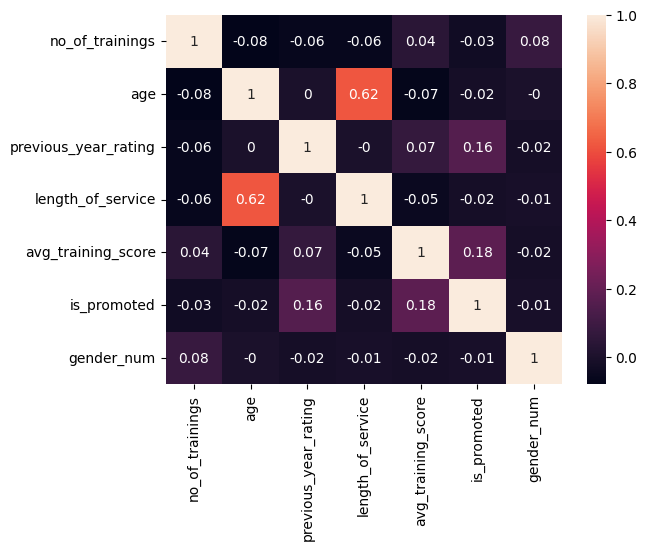

In [8]:
# Pearson coefficients and correlation matrix
df_pearson = data_num.corr(method='pearson', numeric_only=True)
corr_matrix_pear = df_pearson.values.round(decimals=2)
sns.heatmap(corr_matrix_pear, annot=True, xticklabels=col_names, yticklabels=col_names)
plt.show()

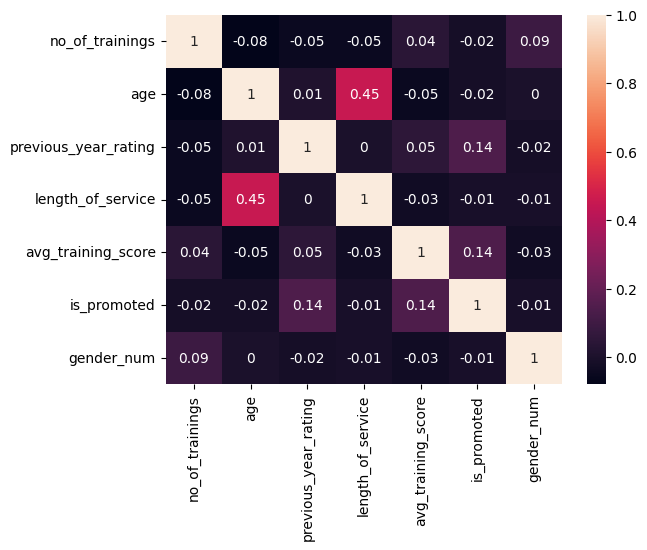

In [9]:
# Kendall coefficients and correlation matrix
df_kendall = data_num.corr(method='kendall', numeric_only=True)
corr_matrix_kendall = df_kendall.values.round(decimals=2)
sns.heatmap(corr_matrix_kendall, annot=True, xticklabels=col_names, yticklabels=col_names)
plt.show()

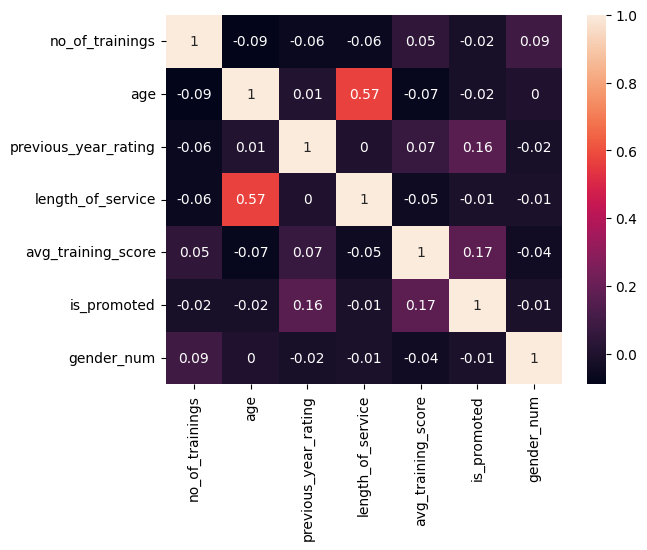

In [10]:
# Spearman coefficients and correlation matrix
df_spearman = data_num.corr(method='spearman', numeric_only=True)
corr_matrix_spear = df_spearman.values.round(decimals=2)
sns.heatmap(corr_matrix_spear, annot=True, xticklabels=col_names, yticklabels=col_names)
plt.show()

### Exploring gender differences
Here, we are going to inspect the data in detail. Let's focus on the gender attribute to detect potential bias. In particular:

- Gender distribution with respect to the target variable (is_promoted)
- Usual range of values of other variables grouped by gender


In [11]:
# Features of interest
gender_feat = 'gender'
target_feat = 'is_promoted'

In [12]:
# Data frames by gender and promotion
df_female = data[data[gender_feat]=='f']
df_male = data[data[gender_feat]=='m']

df_female_promoted = df_female[df_female[target_feat]==1]
df_female_nonpromoted = df_female[df_female[target_feat]==0]

df_male_promoted = df_male[df_male[target_feat]==1]
df_male_nonpromoted = df_male[df_male[target_feat]==0]

In [13]:
# Basic statistics by gender
num_female = df_female.shape[0]
num_male = df_male.shape[0]

num_female_promoted = df_female_promoted.shape[0]
num_male_promoted = df_male_promoted.shape[0]

perc_female_promoted = np.round(num_female_promoted / num_female * 100, decimals=2)
perc_male_promoted = np.round(num_male_promoted / num_male * 100, decimals=2)

print(f"Num female: {num_female} -> Promoted: {perc_female_promoted}%")
print(f"Num male: {num_male} -> Promoted: {perc_male_promoted}%")

Num female: 14033 -> Promoted: 9.34%
Num male: 32347 -> Promoted: 8.54%


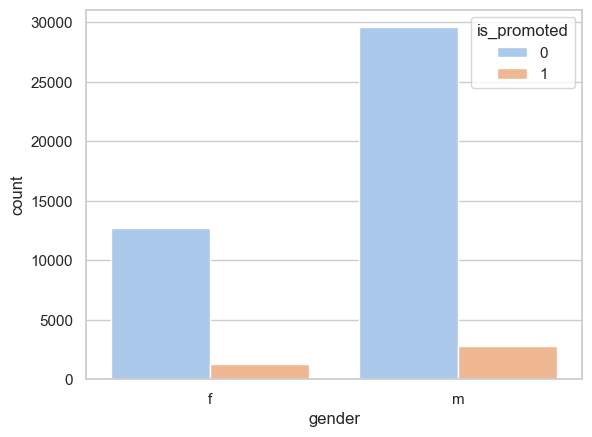

In [14]:
# Plot target variable distribution by gender
sns.set_theme(style='whitegrid', palette='pastel')
sns.countplot(data=data, x=gender_feat, hue=target_feat)
plt.show()

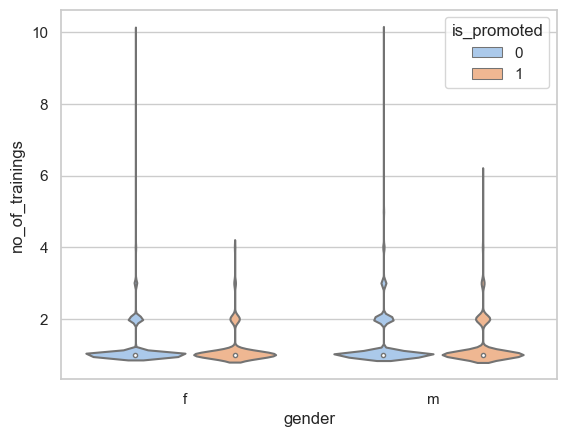

In [15]:
# Number of trainings by gender
sns.violinplot(data=data, x=gender_feat, y='no_of_trainings', hue=target_feat)
plt.show()

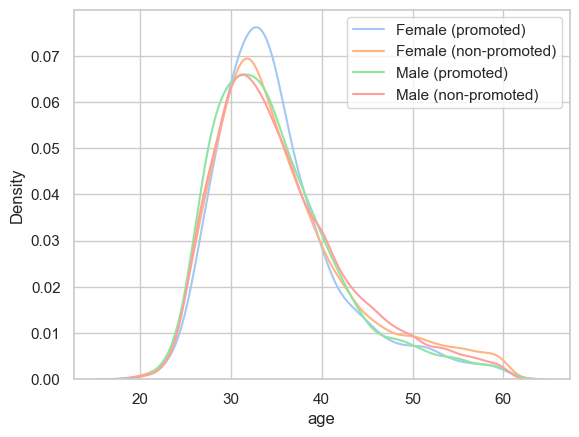

Average age of promotion (female): 35.1
Average age of promotion (male): 34.94


In [16]:
# Age by gender
feat_name = 'age'
sns.kdeplot(data=df_female_promoted[feat_name])
sns.kdeplot(data=df_female_nonpromoted[feat_name])
sns.kdeplot(data=df_male_promoted[feat_name])
sns.kdeplot(data=df_male_nonpromoted[feat_name])
plt.legend(['Female (promoted)', 'Female (non-promoted)', 'Male (promoted)', 'Male (non-promoted)'])
plt.show()

mean_age_female = np.round(np.mean(df_female_promoted[feat_name]), decimals=2)
mean_age_male = np.round(np.mean(df_male_promoted[feat_name]), decimals=2)

print(f"Average age of promotion (female): {mean_age_female}")
print(f"Average age of promotion (male): {mean_age_male}")


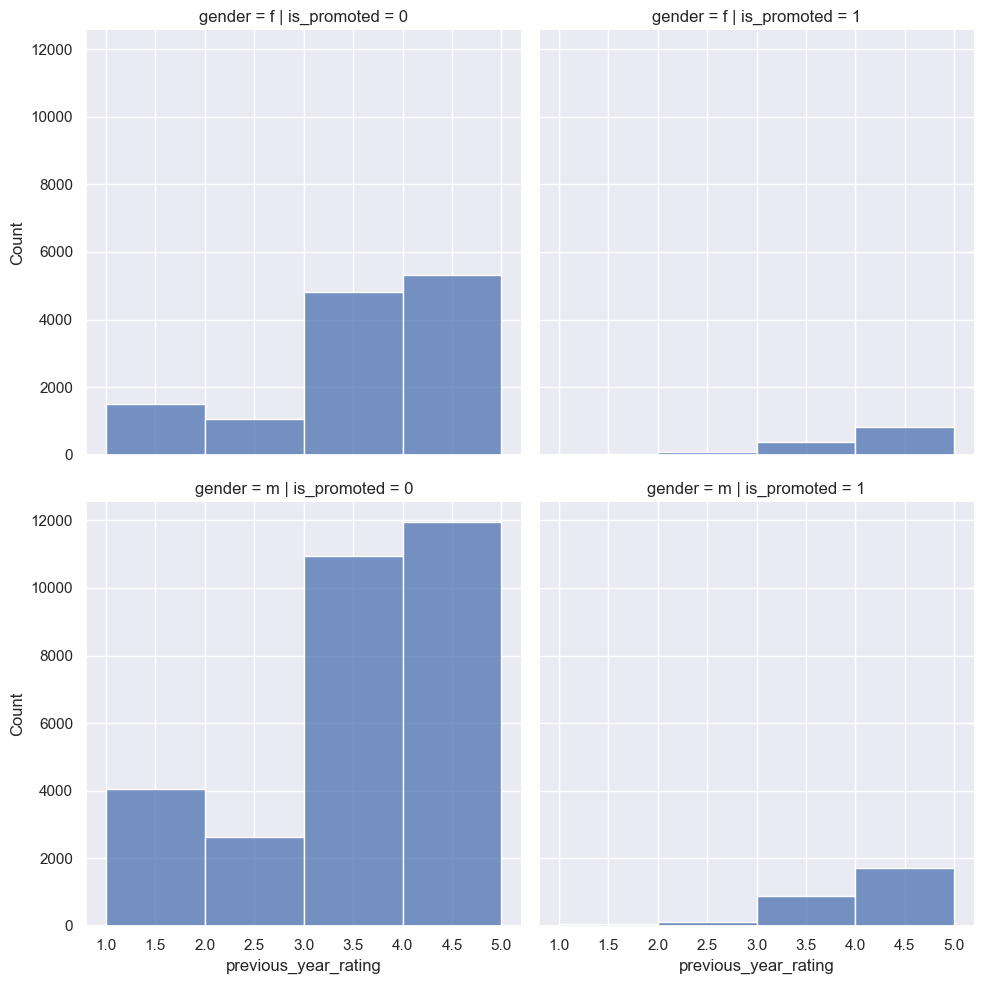

In [17]:
# Previous year rating by gender
sns.set_theme(style='darkgrid')
sns.displot(data=data, x='previous_year_rating', row=gender_feat, col=target_feat, binwidth=1, height=5)
plt.show()

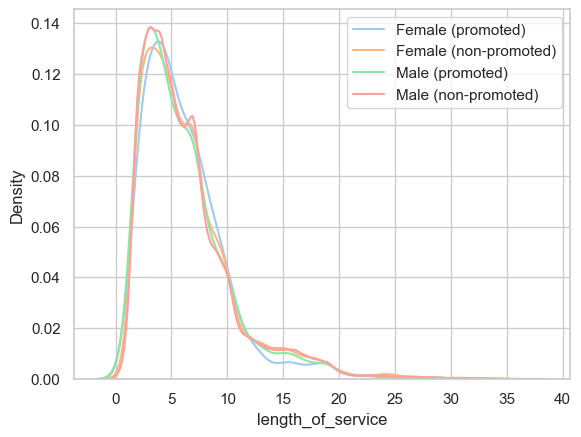

Average length of service for promotion (female): 6.15
Average length of service for promotion (male): 6.08


In [18]:
# Length of service by gender
feat_name = 'length_of_service'
sns.set_theme(style='whitegrid', palette='pastel')
sns.kdeplot(data=df_female_promoted[feat_name])
sns.kdeplot(data=df_female_nonpromoted[feat_name])
sns.kdeplot(data=df_male_promoted[feat_name])
sns.kdeplot(data=df_male_nonpromoted[feat_name])
plt.legend(['Female (promoted)', 'Female (non-promoted)', 'Male (promoted)', 'Male (non-promoted)'])
plt.show()

mean_service_female = np.round(np.mean(df_female_promoted[feat_name]), decimals=2)
mean_service_male = np.round(np.mean(df_male_promoted[feat_name]), decimals=2)

print(f"Average length of service for promotion (female): {mean_service_female}")
print(f"Average length of service for promotion (male): {mean_service_male}")

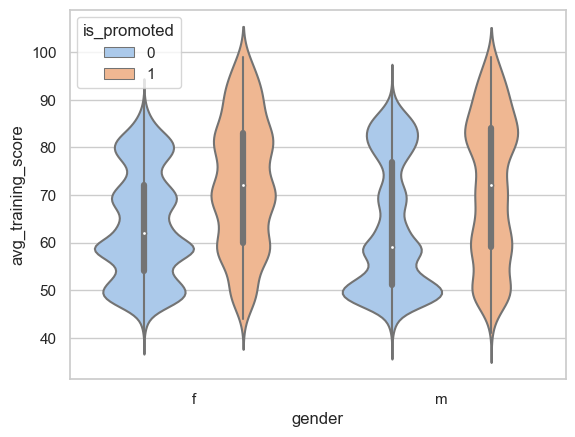

Average training score for promotion (female): 72.37
Average training score for promotion (male): 71.58


In [19]:
# Average training score by gender
feat_name = 'avg_training_score'
sns.violinplot(data=data, x=gender_feat, y=feat_name, hue=target_feat)
plt.show()

mean_training_female = np.round(np.mean(df_female_promoted[feat_name]), decimals=2)
mean_training_male = np.round(np.mean(df_male_promoted[feat_name]), decimals=2)

print(f"Average training score for promotion (female): {mean_training_female}")
print(f"Average training score for promotion (male): {mean_training_male}")

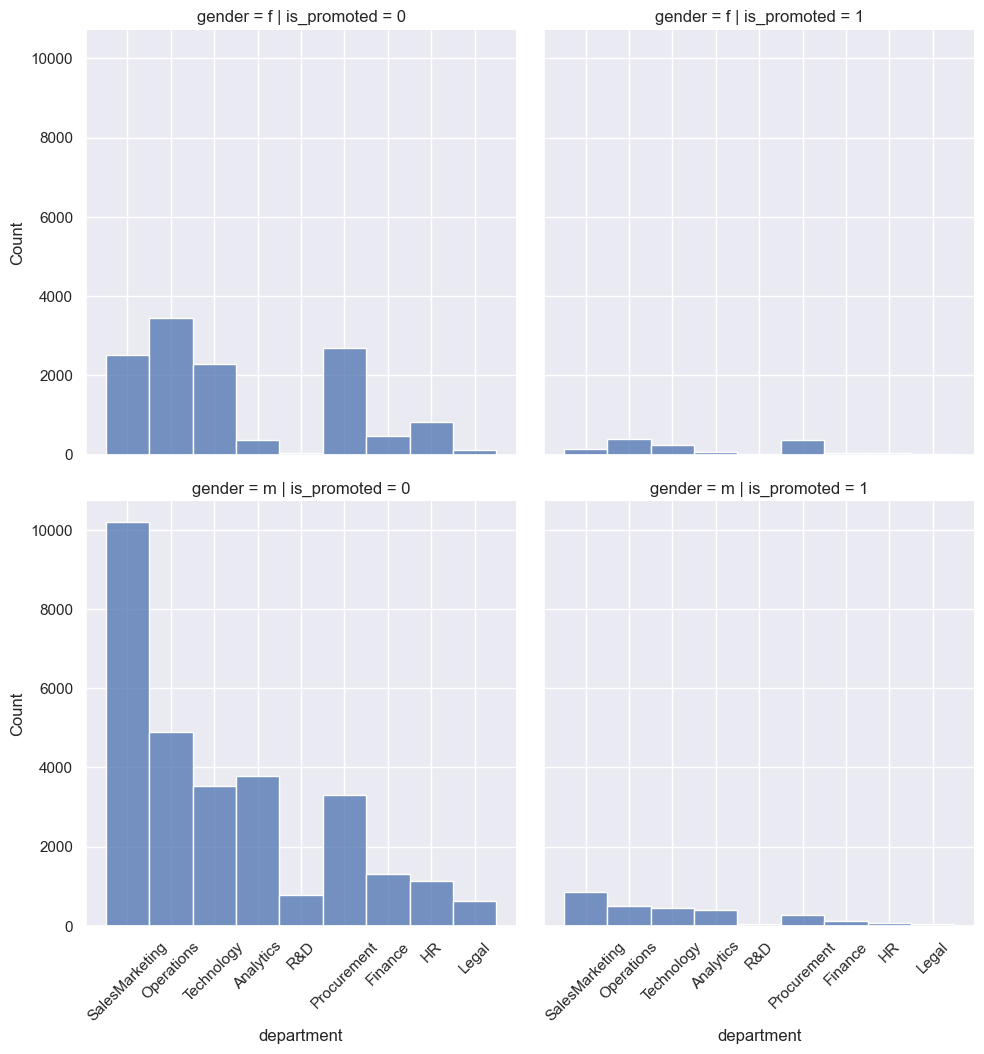

In [20]:
# Department distribution by gender
sns.set_theme(style='darkgrid')
dplot = sns.displot(data=data, x='department', row=gender_feat, col=target_feat, binwidth=1, height=5)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in dplot.axes.flat]
plt.show()

In [21]:
def get_df_percentage_promotions(df_female_promoted, df_male_promoted, feat_name):
    '''
    A function to create a data frame with the percentage of promotion for a given feature, joining data from female and male samples
    df_female_promoted: Data frame with samples of female promotions
    df_male_promoted: Data frame with samples of male promotions
    feat_name: Name of the feature (column) to analyse
    '''
    df_fem_feat = pd.DataFrame(df_female_promoted[feat_name].value_counts())
    df_fem_feat = df_fem_feat.reset_index()
    df_fem_feat.columns = [feat_name, 'female promoted']
    df_fem_feat['perc female promoted'] = np.round(df_fem_feat['female promoted']/np.sum(df_fem_feat['female promoted'])*100, decimals=2)
    df_male_feat = pd.DataFrame(df_male_promoted[feat_name].value_counts())
    df_male_feat = df_male_feat.reset_index()
    df_male_feat.columns = [feat_name, 'male promoted']
    df_male_feat['perc male promoted'] = np.round(df_male_feat['male promoted']/np.sum(df_male_feat['male promoted'])*100, decimals=2)

    df_percentage = df_fem_feat.set_index(feat_name).join(df_male_feat.set_index(feat_name))
    return df_percentage

In [22]:
# Departments by percentage of female/male promotions
df_department = get_df_percentage_promotions(df_female_promoted, df_male_promoted, 'department')
display(df_department)

,female promoted,perc female promoted,male promoted,perc male promoted
department,,,,
Operations,387,29.54,513,18.58
Procurement,369,28.17,282,10.21
Technology,252,19.24,442,16.01
SalesMarketing,148,11.30,852,30.86
Analytics,53,4.05,392,14.20
HR,49,3.74,64,2.32
Finance,44,3.36,128,4.64
R&D,5,0.38,53,1.92
Legal,3,0.23,35,1.27


In [23]:
# Region distribution by gender
df_region = get_df_percentage_promotions(df_female_promoted, df_male_promoted, 'region')
display(df_region)

,female promoted,perc female promoted,male promoted,perc male promoted
region,,,,
region_2,347,26.49,508,18.40
region_22,181,13.82,428,15.50
region_7,156,11.91,305,11.05
region_4,71,5.42,156,5.65
region_13,71,5.42,137,4.96
region_15,60,4.58,136,4.93
region_17,53,4.05,46,1.67
region_23,37,2.82,88,3.19
region_26,35,2.67,89,3.22


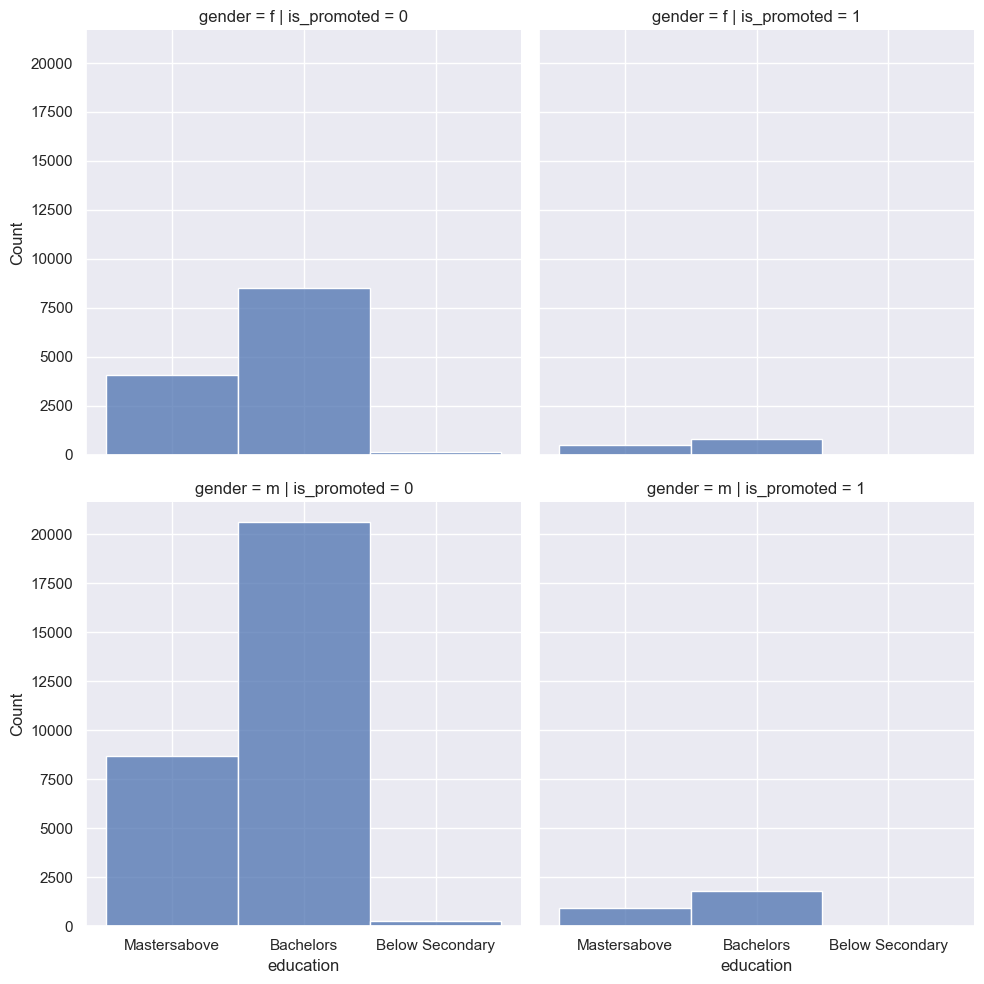

In [24]:
# Education distribution by gender
dplot = sns.displot(data=data, x='education', row=gender_feat, col=target_feat, binwidth=1, height=5)
plt.show()

In [25]:
# Education and percentage of female/male promotions
df_education = get_df_percentage_promotions(df_female_promoted, df_male_promoted, 'education')
display(df_education)

,female promoted,perc female promoted,male promoted,perc male promoted
education,,,,
Bachelors,816,62.29,1811,65.59
Mastersabove,484,36.95,926,33.54
Below Secondary,10,0.76,24,0.87


In [26]:
# Recruitment channel and percentage of female/male promotions
df_recruitment = get_df_percentage_promotions(df_female_promoted, df_male_promoted, 'recruitment_channel')
display(df_recruitment)

,female promoted,perc female promoted,male promoted,perc male promoted
recruitment_channel,,,,
other,714,54.50,1498,54.26
sourcing,556,42.44,1177,42.63
referred,40,3.05,86,3.11


In [27]:
# Awards won? and percentage of female/male promotions
df_awards = get_df_percentage_promotions(df_female_promoted, df_male_promoted, 'awards_won')
display(df_awards)

,female promoted,perc female promoted,male promoted,perc male promoted
awards_won,,,,
0,1162,88.7,2417,87.54
1,148,11.3,344,12.46
